In [23]:
%run ../modules.ipynb
sys.path.append('../0. kernel-tutorials/')
# Local Utilities for Notebook
from utilities.kernels import linear_kernel, gaussian_kernel
from utilities.general import load_variables, get_stats
from utilities.plotting import (
    plot_base, 
    plot_projection,
    plot_regression,
    plot_simple,
    get_cmaps,
    table_from_dict,
    check_mirrors,
)
cmaps = get_cmaps()
plt.style.use("../0. kernel-tutorials/utilities/kernel_pcovr.mplstyle")
dbl_fig = (2 * plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1])

kernel_params = {"kernel": "rbf", "gamma": 1}
kernel_func = partial(rbf_kernel, gamma=1)
kernel_type = "gaussian"

n_FPS = 200
n_frames = 1000

../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarHot' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarBWR' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:35: UserWarning: Trying to register the cmap 'cbarPhi' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarHot_0.3_1.05' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'bone_r_0.2_1.0' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'Reds_0.3_1.0' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/ut

In [3]:
"""importing reduced dataset without nan, 7676 entries"""

# from matminer.datasets import load_dataset

# df1 = load_dataset("mp_all_20181018")
# df1.dropna(inplace=True)
# df1.reset_index(drop=True, inplace=True)

# compression_opts = dict(method='zip',
#                         archive_name='MP_red.csv')  

# df1.to_csv('MP_red.zip', index=False,
#           compression=compression_opts)  

# ase_frames=[]
# for i in df1['initial structure']:
#     frame=get_atoms(i)
# #     frame.wrap(eps=1e-12)
#     ase_frames.append(frame)
    
# xyz=ase.io.write('MP_red.xyz', ase_frames)


'importing reduced dataset without nan, 7676 entries'

In [4]:
# zf = zipfile.ZipFile('./MP_red.zip') 
# df_csv_red = pd.read_csv(zf.open('MP_red.csv'), usecols=['e_hull','gap pbe', 'mu_b',
#                                                          'structure', 'elastic anisotropy','bulk modulus', 'shear modulus', 'e_form'])
# frames_init_red=ase.io.read('MP_red.xyz', index=':')
# for frame in frames_init_red:
#     frame.wrap(eps=1e-10)

In [5]:
# len(frames_init_red)

In [6]:
# print(len(df_csv_red))
# natoms_list_tot=[]
# for i in range(len(df_csv_red)):
#     natoms_list_tot.append(natoms(df_csv_red['structure'][i]))
# df_csv_red['natoms']=natoms_list_tot

# magic=[]
# for i in range(len(df_csv_red)):
#     if natoms_list_tot[i]%4==0:
#         m=1
#     else:
#         m=0
#     magic.append(m)
# df_csv_red['magic']=magic   

# df_csv_red.head()

In [2]:
"""Whole dataset with all nan values 83989 entries"""

"""The file has been created in zip format, reading it"""

frames_init_tot=ase.io.read('MP_complete_init.xyz', index=':')
frames_relax_tot=ase.io.read('MP_complete_relax.xyz', index=':')

for frame in frames_relax_tot:
    frame.wrap(eps=1e-10)
for frame in frames_init_tot:
    frame.wrap(eps=1e-10)
   
zf = zipfile.ZipFile('./MP_complete.zip') 
df_csv = pd.read_csv(zf.open('MP_complete.csv'))

natoms_list_tot=[]
magic=[]
for i in range(len(df_csv)):
    natoms_list_tot.append(natoms(df_csv['structure'][i]))
    
df_csv['natoms']=natoms_list_tot
magic=[]
for i in range(len(df_csv)):
    if natoms_list_tot[i]%4==0:
        m=1
    else:
        m=0
    magic.append(m)
df_csv['magic']=magic             
df_csv.head()

mpid formula    e_hull  gap pbe          mu_b  elastic anisotropy  \
0      mp-85      In  0.003319   0.0000  2.700000e-05            1.044699   
1     mp-110      Mg  0.039182   0.0000 -1.360000e-05          -11.326659   
2      mp-20      Be  0.108143   0.0000  1.000000e-07            8.030000   
3    mp-8640      Hf  0.071216   0.0000 -2.050000e-05            0.881277   
4  mp-674158       P  3.509988   2.0113  3.000042e+00           10.884643   

   bulk modulus  shear modulus  \
0     33.154748       4.904836   
1     35.636106       1.830272   
2    124.000000      84.000000   
3    101.242732      44.836516   
4      0.327165      -0.064038   

                                           structure    e_form  \
0  Full Formula (In1)\nReduced Formula: In\nabc  ...  0.003319   
1  Full Formula (Mg1)\nReduced Formula: Mg\nabc  ...  0.039182   
2  Full Formula (Be4)\nReduced Formula: Be\nabc  ...  0.108143   
3  Full Formula (Hf1)\nReduced Formula: Hf\nabc  ...  0.071216   
4  Full Formula (P1)\nReduced Formula: P\nabc   :...  3.509988   

                                   initial structure  natoms  magic  
0  Full Formula (In1)\nReduced Formula: In\nabc  ...       1      0  
1  Full Formula (Mg1)\nReduced Formula: Mg\nabc  ...       1      0  
2  Full Formula (Be4)\nReduced Formula: Be\nabc  ...       4      1  
3  Full Formula (Hf1)\nReduced Formula: Hf\nabc  ...       1      0  
4  Full Formula (P1)\nReduced Formula: P\nabc   :...       1      0

In [3]:
"""to change according to needs"""

frames_init=np.copy(frames_relax_tot)

/home/egazzarrini/miniconda3/envs/aiida/lib/python3.8/site-packages/numpy/lib/function_base.py:793: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


In [4]:
species = list(set([int(n) for frame in frames_init for n in frame.numbers]))

hypers = dict(
    soap_type="PowerSpectrum",
    interaction_cutoff=3.5,
    max_radial=4,
    max_angular=4,
    gaussian_sigma_type="Constant",
    gaussian_sigma_constant=0.5,
    cutoff_smooth_width=0.5,
    global_species=species,
    expansion_by_species_method="user defined",
    normalize=False,
)
fps_soap = SOAP(
    **hypers,
)

In [10]:
# select=6000
# formE, gap, hull, frames_init, frames_relax, natoms_list = zip(*random.sample(list(zip(formE_tot, gap_tot, hull_tot, frames_init_tot, frames_relax_tot, natoms_list_tot)), select))
# len(formE),len(hull), len(frames_init), len(frames_relax), len(natoms_list)

In [5]:
idx_for_fps = np.random.randint(0, len(frames_init), 500) 
frames_for_fps = [frames_init[i] for i in idx_for_fps]

In [6]:
X_temp = np.array(
    [
        np.mean(fps_soap.transform([frame]).get_features(fps_soap), axis=0)
        for frame in frames_for_fps
    ]
)

THRESH = 1e-12
high_var_features = np.where(np.var(X_temp - X_temp.mean(axis=0), axis=0) > THRESH)[0]
X_temp = X_temp[:, high_var_features]

X_raw = StandardFlexibleScaler(column_wise=False).fit_transform(X_temp)
del X_temp # save on memory

In [7]:
fps = FPS(n_FPS).fit(X_raw)
del X_raw # save on memory

In [8]:
u_species = np.unique(species)
sp_pairs = fps_soap.get_keys(u_species)

In [9]:
coefficient_subselection = np.zeros((n_FPS, 5))
index_mapping = get_power_spectrum_index_mapping(
    sp_pairs, n_max=hypers["max_radial"], l_max=hypers["max_angular"] + 1
)

for fi, i in enumerate(high_var_features[fps.selected_idx_]):
    coefficient_subselection[fi] = [
        index_mapping[i][k] for k in ["a", "b", "n1", "n2", "l"]
    ]

In [10]:
print(coefficient_subselection)

coefficient_subselection_dict = {
    "a": coefficient_subselection[:, 0].tolist(),
    "b": coefficient_subselection[:, 1].tolist(),
    "n1": coefficient_subselection[:, 2].tolist(),
    "n2": coefficient_subselection[:, 3].tolist(),
    "l": coefficient_subselection[:, 4].tolist(),
}

soap = SOAP(**hypers, coefficient_subselection=coefficient_subselection_dict)

[[  1.   1.   0.   0.   0.]
 [  8.   8.   2.   2.   0.]
 [  8.  12.   2.   3.   0.]
 [  4.   4.   2.   2.   0.]
 [  9.   9.   2.   2.   0.]
 [ 28.  28.   2.   2.   0.]
 [  8.   8.   0.   0.   0.]
 [  5.   5.   2.   2.   0.]
 [ 27.  27.   2.   2.   0.]
 [ 12.  12.   0.   0.   0.]
 [  8.   8.   2.   2.   4.]
 [  8.   8.   3.   3.   0.]
 [  6.   6.   2.   2.   0.]
 [ 16.  16.   0.   0.   0.]
 [  7.   7.   2.   2.   0.]
 [ 26.  26.   2.   2.   0.]
 [  3.   8.   2.   2.   0.]
 [ 29.  29.   2.   2.   0.]
 [ 52.  52.   0.   0.   0.]
 [ 14.  14.   0.   0.   0.]
 [ 31.  31.   3.   3.   0.]
 [  8.  27.   2.   2.   0.]
 [  8.  12.   3.   3.   0.]
 [  4.   4.   2.   3.   0.]
 [  8.   8.   0.   2.   0.]
 [  1.   8.   2.   3.   0.]
 [ 28.  28.   3.   3.   0.]
 [  8.  25.   2.   2.   0.]
 [ 34.  34.   0.   0.   0.]
 [ 77.  77.   2.   2.   0.]
 [ 19.  19.   0.   0.   0.]
 [  1.   6.   2.   2.   0.]
 [  3.   3.   0.   0.   0.]
 [ 15.  15.   0.   0.   0.]
 [ 17.  17.   0.   0.   0.]
 [  5.   5.   0.   0

In [11]:
frame_idx = np.random.randint(0, len(frames_init), n_frames)
my_frames = [frames_init[i] for i in frame_idx]

X_raw = np.zeros((len(my_frames), n_FPS))
for fi, frame in enumerate(my_frames):
    X_raw[fi] = np.mean(soap.transform([frame]).get_features(soap), axis=0)

In [12]:
y_merged=[]

y_merged.append(np.array(df_csv["e_form"]).reshape(-1, 1)[frame_idx])
y_merged.append(np.array(df_csv["e_hull"]).reshape(-1, 1)[frame_idx])
y_merged.append(np.array(df_csv["gap pbe"]).reshape(-1, 1)[frame_idx])
y_merged.append(np.array(df_csv["mu_b"]).reshape(-1, 1)[frame_idx])
# y_merged.append(np.array(df_csv["elastic anisotropy"]).reshape(-1, 1)[frame_idx])
# y_merged.append(np.array(df_csv["bulk modulus"]).reshape(-1, 1)[frame_idx])
# y_merged.append(np.array(df_csv["shear modulus"]).reshape(-1, 1)[frame_idx])

y_atom = np.array(df_csv['magic']).reshape(-1, 1)[frame_idx]

len(y_atom), len(y_merged), len(y_merged[0])

(1000, 4, 1000)

In [13]:
# np.savez("../datasets/E_form_MP.npz", indices=range(n_frames), 
#          magic=y_atom, soap_v=X_raw, E_form=y_raw)
y_merged 

[array([[ -6.41697377e-01],
        [ -1.45220549e+00],
        [ -1.58541600e+00],
        [ -1.88185101e+00],
        [ -2.20694765e+00],
        [ -1.26204997e+00],
        [ -2.34867469e+00],
        [ -1.18349940e+00],
        [  2.04333891e-01],
        [ -2.05301213e+00],
        [ -5.86207747e-01],
        [  2.08407740e-01],
        [ -7.68279456e-01],
        [ -6.64541899e-01],
        [ -7.52403790e-01],
        [ -1.16472090e+00],
        [ -6.63577885e-01],
        [ -3.90562231e-02],
        [ -7.80057014e-01],
        [ -4.20672014e-01],
        [ -2.90666000e+00],
        [ -2.16964462e+00],
        [ -1.91097441e-01],
        [ -2.57918125e+00],
        [ -7.94101686e-01],
        [ -2.99769066e+00],
        [  1.12999208e-01],
        [ -1.49244747e+00],
        [ -1.70075127e+00],
        [ -5.28921191e-02],
        [ -1.91927643e+00],
        [ -2.03150233e-01],
        [  1.80491000e-02],
        [ -1.58314521e-01],
        [ -2.28848217e+00],
        [ -1.8738595

In [14]:
# npzfile = np.load("../datasets/E_form_MP.npz")
# # npzfile.files
# X_raw=npzfile['soap_v']
# y_raw=npzfile['E_form']
# y_atom=npzfile['magic']

In [15]:
X_raw_tot=np.copy(X_raw)

In [16]:
alphas=np.logspace(-0, -6, 30)
ridgecv = RidgeCV(cv=6,fit_intercept=False, alphas=alphas)
mixing = 0.5

In [17]:
pcovr = KPCovR(mixing=mixing, n_components=2, **kernel_params, center=True, alpha=1E-4)

R^2 with PCovR=  0.797292655865
R^2 of testing is with RidgeCV 0.729477721157
RMSE on predicted quantity =  0.295642774778
error in units (eV) of predicted quantity before scaling =  [ 2.22595938]
error in units (eV) of predicted quantity after scaling=  [ 1.76188141]


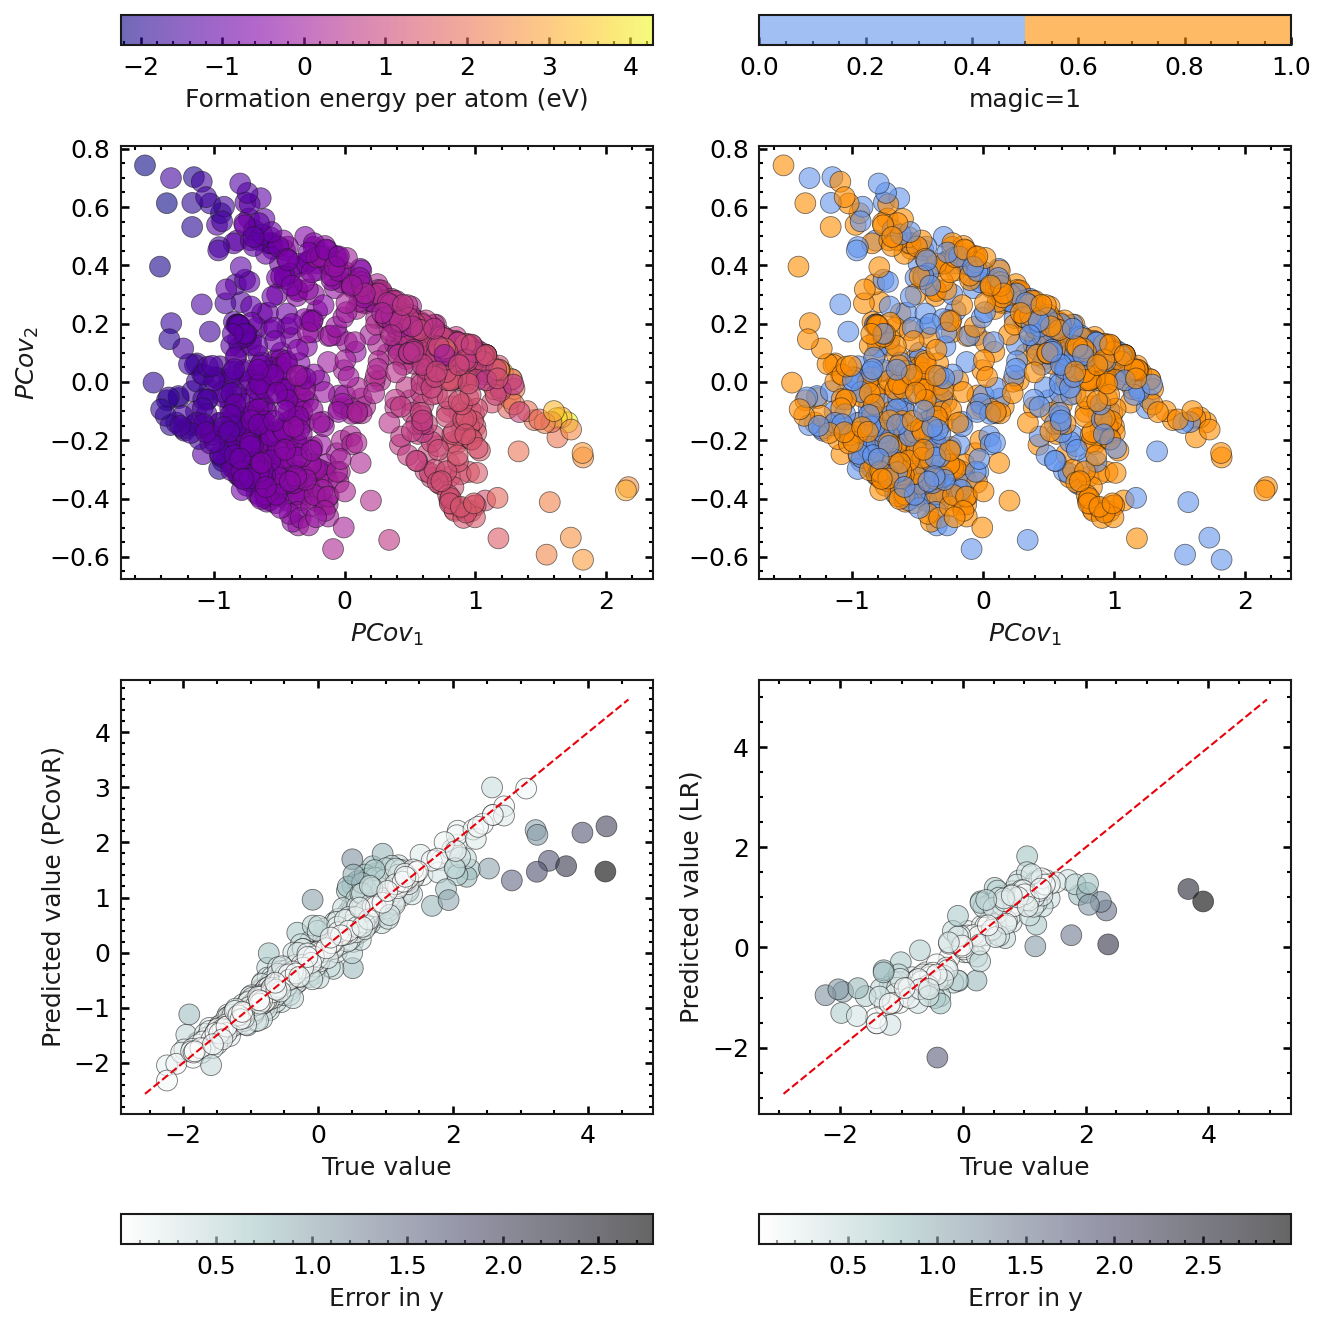

R^2 with PCovR=  1.17249735339
R^2 of testing is with RidgeCV 0.00597518717134
RMSE on predicted quantity =  1.10228468486
error in units (eV) of predicted quantity before scaling =  [ 3.97718861]
error in units (eV) of predicted quantity after scaling=  [ 9.30670047]


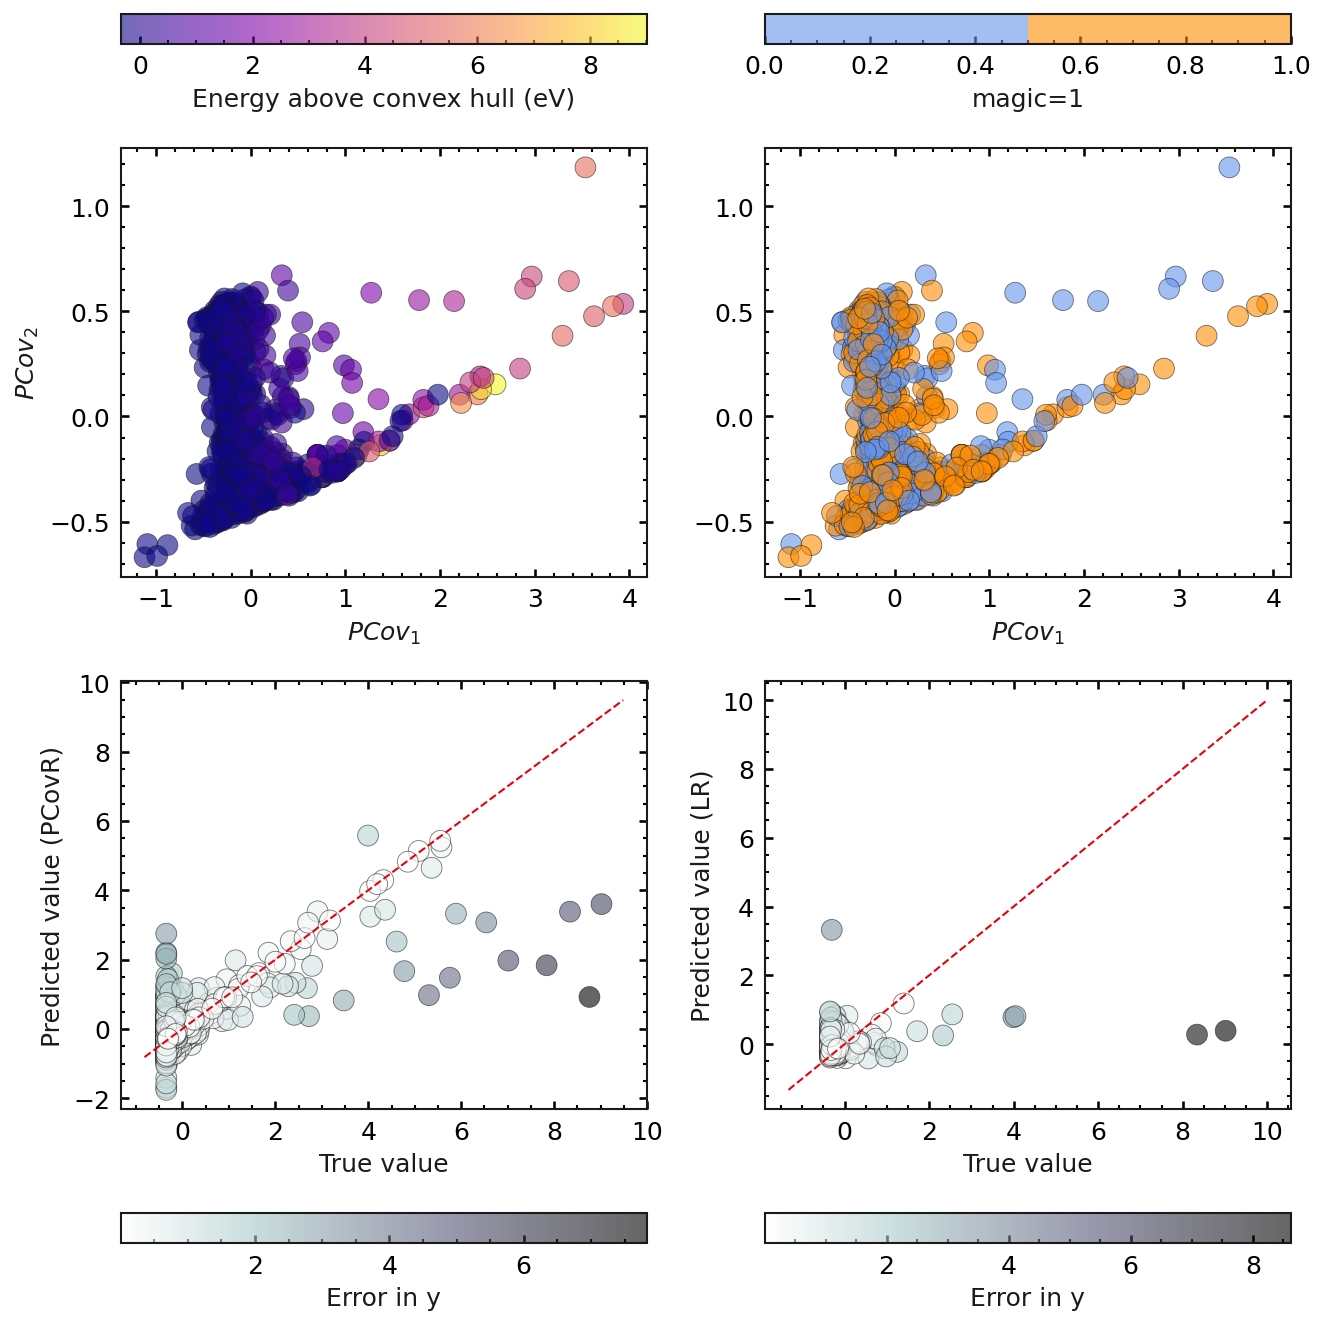

R^2 with PCovR=  0.908887204452
R^2 of testing is with RidgeCV 0.413487769747
RMSE on predicted quantity =  0.597828385715
error in units (eV) of predicted quantity before scaling =  [ 4.11708125]
error in units (eV) of predicted quantity after scaling=  [ 2.72284789]


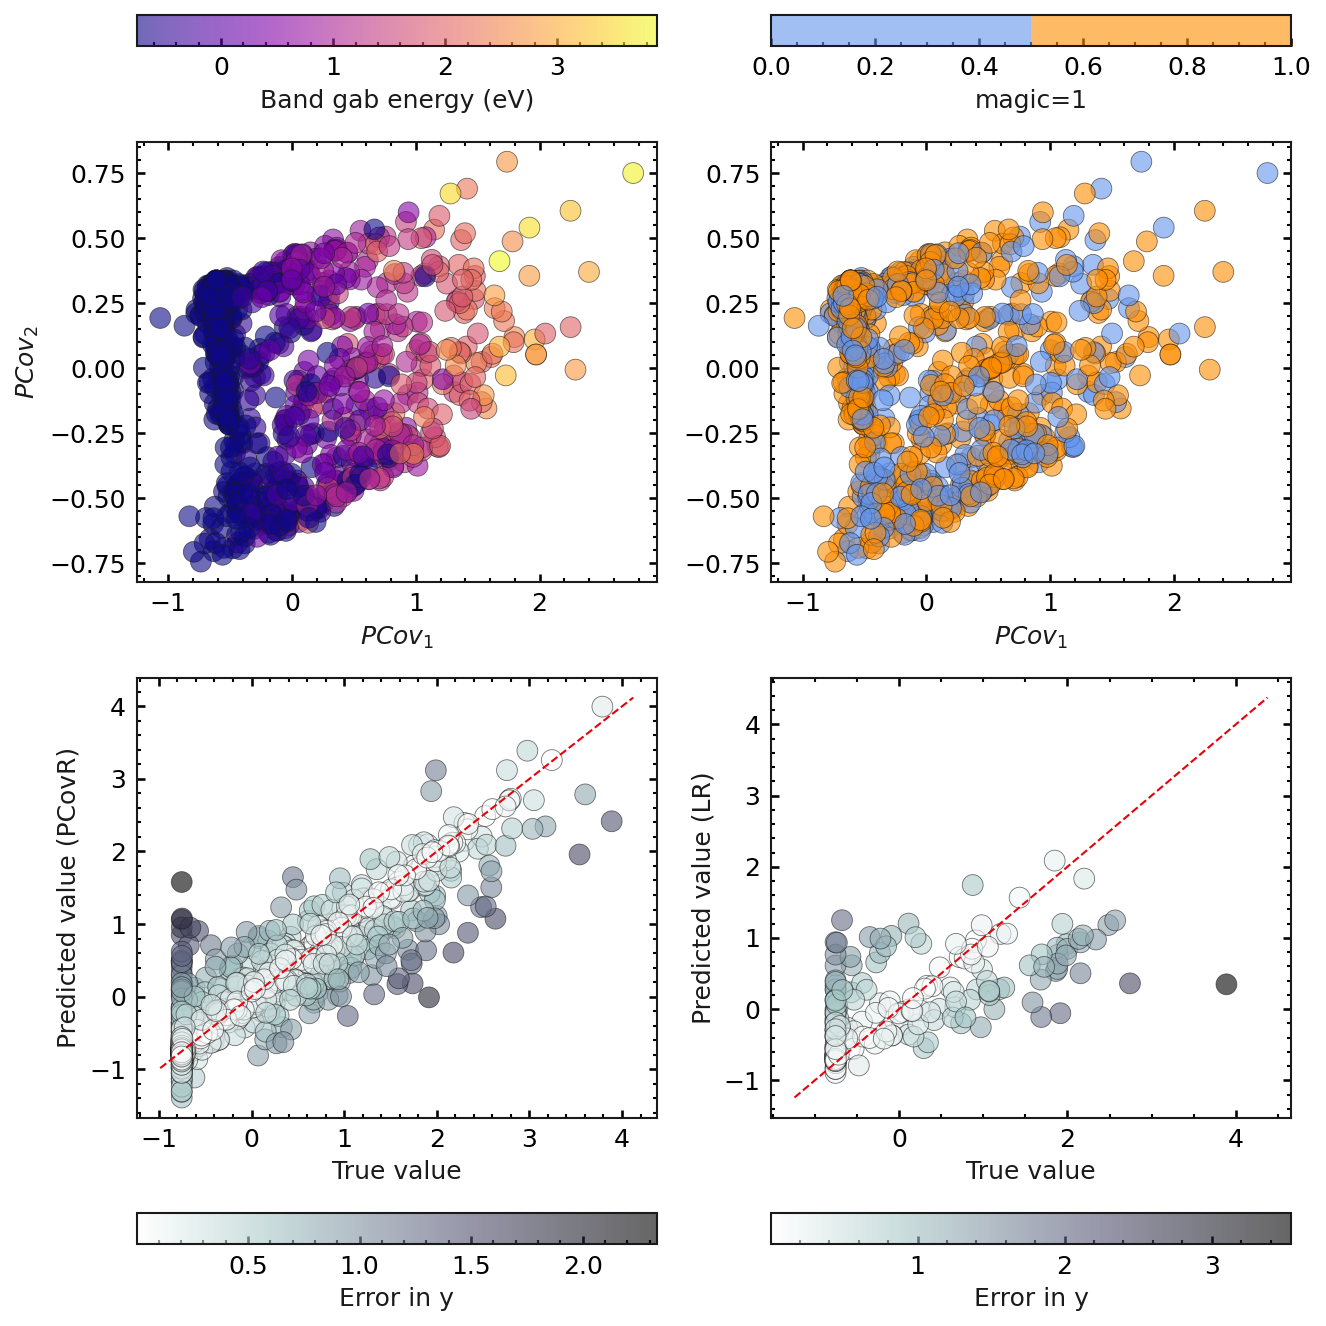

R^2 with PCovR=  0.918442975326
R^2 of testing is with RidgeCV 0.343528129311
RMSE on predicted quantity =  0.542132584865
error in units (eV) of predicted quantity before scaling =  [ 106.34843983]
error in units (eV) of predicted quantity after scaling=  [ 9.3176877]


IndexError: list index out of range

In [18]:
titles=['Formation energy per atom (eV)', 'Energy above convex hull (eV)', 'Band gab energy (eV)', 'Total magnetisation']
       # 'Elastic anisotropy ratio', 'Bulk modulus (GPa)', 'Shear modulus (GPa)']

for i in range(len(titles)+1):
    
    X=np.copy(X_raw_tot)
    y_raw=y_merged[i]
    
    i_train, i_test, X_train, X_test, y_train, y_test = train_test_split(
    np.arange(X.shape[0]), X, y_raw, train_size=0.8
    )

    x_scaler = StandardFlexibleScaler(column_wise=False).fit(X)
    y_scaler = StandardFlexibleScaler(column_wise=True).fit(y_raw)

    # Center total dataset
    X = x_scaler.transform(X)
    Y = y_scaler.transform(y_raw)

    # Center training data
    X_train = x_scaler.transform(X_train)
    y_train = y_scaler.transform(y_train)

    # Center training data
    X_test = x_scaler.transform(X_test)
    y_test = y_scaler.transform(y_test)
    
    pcovr.fit(X,Y)
    
    T = pcovr.transform(X)
    yp = pcovr.predict(X)
    
    ridgecv.fit(X_train, y_train)
    yp_test=ridgecv.predict(X_test)

    fig, ((caxT, caxM),(axT, axM),  (axy, axy_reg), (caxy, caxy_reg)) = plt.subplots(
        4, 2, figsize=(9,9), gridspec_kw=dict(height_ratios=(0.07, 1, 1, 0.07)))

    scatT = axT.scatter(T[:, 0], T[:, 1], alpha=0.6, c=Y, cmap='plasma', edgecolor="k")
    axT.set_xlabel(r"$PCov_1$")
    axT.set_ylabel(r"$PCov_2$")
#     axT.set_title("Latent Projection")
    fig.colorbar(scatT, cax=caxT, label=titles[i], orientation="horizontal")

    scatM = axM.scatter(T[:, 0], T[:, 1], alpha=0.6, c=y_atom, cmap = colors.ListedColormap(['cornflowerblue', 'darkorange']), edgecolor="k")
    axM.set_xlabel(r"$PCov_1$")
#     axM.set_ylabel(r"$PCov_2$")
#     axM.set_title("Latent Projection")
    fig.colorbar(scatM, cax=caxM, label="magic=1", orientation="horizontal")

    scaty = axy.scatter(Y, yp, alpha=0.6, c=np.abs(Y - yp), cmap='bone_r', edgecolor="k")
    axy.plot(axy.get_xlim(), axy.get_xlim(), 'r--')
    axy.set_xlabel(r"True value")
    axy.set_ylabel(r"Predicted value (PCovR)")
#     axy.set_title("Regression with PCovR")
    fig.colorbar(scaty, cax=caxy,label='Error in y', orientation="horizontal")
    
    scaty_reg=axy_reg.scatter(y_test, yp_test, c=np.abs(y_test - yp_test), cmap="bone_r", ec="k", alpha=0.6,)    
    axy_reg.plot(axy.get_xlim(), axy.get_xlim(), 'r--')
    axy_reg.set_xlabel(r"True value")
    axy_reg.set_ylabel(r"Predicted value (LR)")
#     axy.set_title("Linear Regression")
    fig.colorbar(scaty_reg, cax=caxy_reg,label='Error in y', orientation="horizontal")
    
#     fig.suptitle(str(titles[i]))
    fig.tight_layout()

    print('R^2 with PCovR= ', pcovr.score(X,Y))
    print('R^2 of testing is with RidgeCV', ridgecv.score(X_test,y_test))
    print("RMSE on predicted quantity = ", mean_squared_error(y_test, yp_test))
    print("error in units (eV) of predicted quantity before scaling = ", (max(y_raw)-min(y_raw))*(1-ridgecv.score(X_test,y_test)))
    print("error in units (eV) of predicted quantity after scaling= ", (max(Y)-min(Y))*(1-ridgecv.score(X_test,y_test)))

    plt.show()
    plt.close()

In [39]:
df = pd.DataFrame(T, columns=['0', '1'])
df['magic']=y_atom
df.head()

0         1  magic
0 -0.381762  0.273434      0
1 -0.113644 -0.141414      0
2 -0.439724  0.265695      0
3 -0.151291 -0.552474      1
4 -0.197758 -0.589176      1

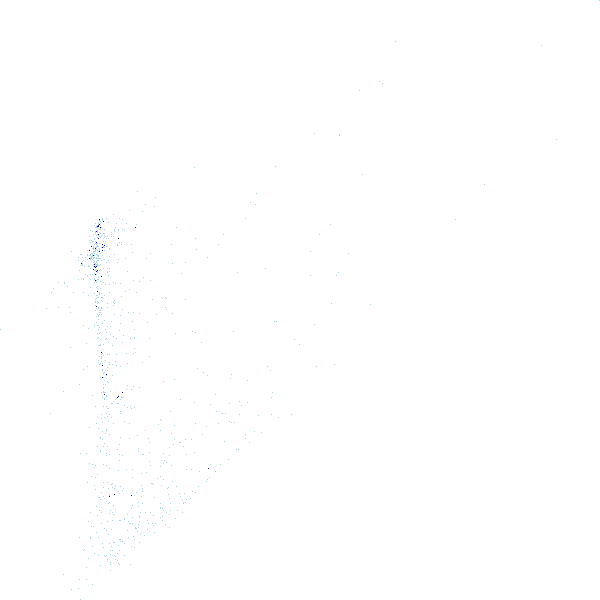

In [45]:
agg = ds.Canvas().points(df, '0', '1')
ds.tf.set_background(ds.tf.shade(agg), "white")



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
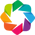

:DynamicMap   []
   :RGB   [0,1]   (R,G,B,A)

In [56]:
import holoviews as hv
import holoviews.operation.datashader as hd
hd.shade.cmap=["blue", "red"]
hv.extension("bokeh", "matplotlib") 


import datashader.transfer_functions as tf
from collections import OrderedDict as odict
points = hv.Points(df.sample(1000))
# hv.output(backend="bokeh")
# hd.datashade(points)

datashaded = hd.datashade(points, aggregator=ds.count_cat('magic'))#.redim.range(x=(-5,5),y=(-5,5))
hd.dynspread(datashaded, threshold=0.9, how='over', max_px=5).opts(height=500,width=500)


In [60]:
from datashader.colors import Sets1to3

datashaded  = hd.datashade(points, aggregator=ds.count_cat('magic'), color_key=Sets1to3)
gaussspread = hd.dynspread(datashaded, threshold=0.50, how='over').opts(plot=dict(height=400,width=400))

color_key = [(name,color) for name,color in zip(["magic","non-magic"], Sets1to3)]
color_points = hv.NdOverlay({n: hv.Points([0,0], label=str(n)).opts(color=c,size=0) for n,c in color_key})

color_points * gaussspread

:DynamicMap   []
   :Overlay
      .NdOverlay.Magic :NdOverlay   [Element]
         :Points   [x,y]
      .RGB.I           :RGB   [0,1]   (R,G,B,A)

In [73]:
import matplotlib.pyplot as plt
from datashader.mpl_ext import dsshow, alpha_colormap
# plt.figure(figsize=(4, 4))

ax = plt.subplot(111)
artist0 = dsshow(df, ds.Point('0', '1'), ds.count_cat('magic'), vmax=1000, aspect='equal',ax=ax)
# artist4 = dsshow(
#     df, 
#     ds.Point('0', '1'), 
#     ds.count_cat('magic'),
#     ax=ax
# )
plt.legend(handles=artist0.get_legend_elements());
plt.title('Point category');


ValueError: input must be categorical

In [28]:
n_PC=2
data = write_input(
    path="try.json.gz",
    meta={"name": "MP PCovR"},
    frames=my_frames,
    properties={
        **{f"PCA_{i+1}": {"target": "structure", 
        "values": T[:, i]} for i in range(n_PC)},
        
#         "species": {
#             "target": "atom",
#             "values": np.concatenate([frame.numbers for frame in frames]),
#         },
#         "formation energies": {
#             "target": "atom",
#             "values": formE_new,
#         },
        "magic": {
            "target": "structure",
            "values": y_atom,
        },
    },
    
    # This should be the same cutoff used to generate the features
#     cutoff=3.5,
)